# **Graficador de casos del COVID-19**

*Analisis y visualización de datos sobre los casos de coronavirus en distintos paises*

<img width="450" height="300" src="https://cdn.pixabay.com/photo/2020/02/04/16/53/hand-washing-4818792_960_720.jpg">

En esta era de la desinformación puede resultar útil poder sacar uno mismo sus propias conclusiones acerca de los datos presentados. El objetivo de este trabajo es obtener datos de casos y muertes por el Coronavirus de un repositorio de datos online y graficar por país.

* La aplicación debe recibir del usuario el nombre del país deseado y graficar casos detectados y fallecimientos totales para ese país en función del tiempo.
* Pedir al usuario ingresar dos paises y gráficar para dichos países la cantidad de casos y fallecimientos en dos gráfico con etiquetas, el usuario debe ingresar el intervalo de tiempo a graficar. Calcular las intersecciónes entre graficos si las hubiera y marcarlas con un punto.
* Pedir al usuario ingresar *n* países y gráficar para dichos países la cantidad de casos en una [escala logaritmica](https://es.wikipedia.org/wiki/Escala_logar%C3%ADtmica). El programa debe pedirle al usuario el intervalo de tiempo
* Almacenar en un archivo de excel los países ordenados de mayor cantidad de casos a menor cantidad de casos indicando en las distintas columnas la cantidad de casos y fallecimientos de cada país. Colocar en distintas hojas del archivo excel la evolución de este ranking, es decir armar una hoja para cada día transcurrido (Defina los días a utilizar acorde a cuanta información se disponga, podría ser una entrada del programa).

**Sugerencia:**
*   Se pueden rotar las leyendas usando `plt.xticks(rotation=60)` (rotación de 60 grados). Es útil para leyendas largas, como por ejemplo, fechas.  
*   En esta [página web](https://nexiandigitalacademy.es/visualizacion-y-procesamiento-de-datos-ante-de-la-pandemia-del-covid-19/) hay un ejemplo de gráficos logaritmicos






In [1]:
!wget 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
#'https://covid.ourworldindata.org/data/ecdc/full_data.csv'

--2024-03-05 09:32:04--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.26.3.153, 172.67.73.95, 104.26.2.153, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.26.3.153|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://covid-19.nyc3.digitaloceanspaces.com/public/owid-covid-data.csv [following]
--2024-03-05 09:32:04--  https://covid-19.nyc3.digitaloceanspaces.com/public/owid-covid-data.csv
Resolving covid-19.nyc3.digitaloceanspaces.com (covid-19.nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to covid-19.nyc3.digitaloceanspaces.com (covid-19.nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98544382 (94M) [binary/octet-stream]
Saving to: ‘owid-covid-data.csv.1’

owid-covid-data.csv 100%[===================>]  93,98M  8,67MB/s    in 12s     

2024-03-05 09:32:16 

**Librerías y Lectura de datos**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import datetime
import xlsxwriter
datos = pd.read_csv("owid-covid-data.csv")

**Gráfico de los casos y muertes de un país específico.**

Ingrese País a graficar: 


 Argentina


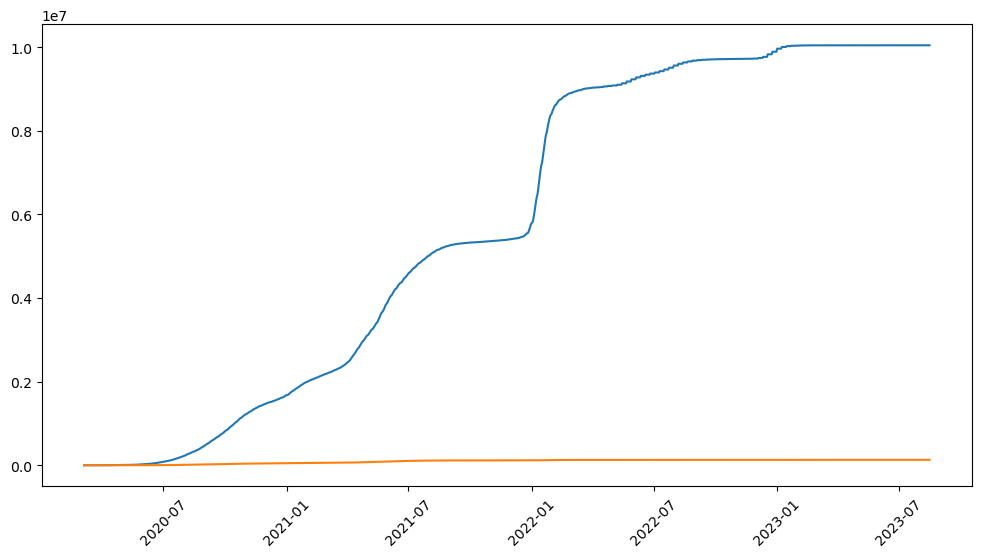

In [3]:

print("Ingrese País a graficar: ")
paisElegido = input()
datosElegido = {}
datosElegido = datos[datos['location'] == paisElegido]
listElegido = datosElegido.to_dict("list")
x = pd.to_datetime(listElegido['date'])
y1 = listElegido['total_cases']
y2 = listElegido['total_deaths']
plt.figure(figsize=(12, 6))
plt.plot(x, y1)
plt.plot(x, y2)
#plt.axis([pd.to_datetime(fechaInicial), pd.to_datetime(fechaFinal), 0, 1500000])
plt.xticks(rotation=45)
plt.show()

**Comparativa entre dos países de los casos y muertes por covid19**

Ingrese dos países para la comparativa: 


 Argentina
 Chile


Ingrese el intervalo de fechas requerido:


 2020-03-04
 2020-05-05


[Timestamp('2020-03-15 00:00:00')]


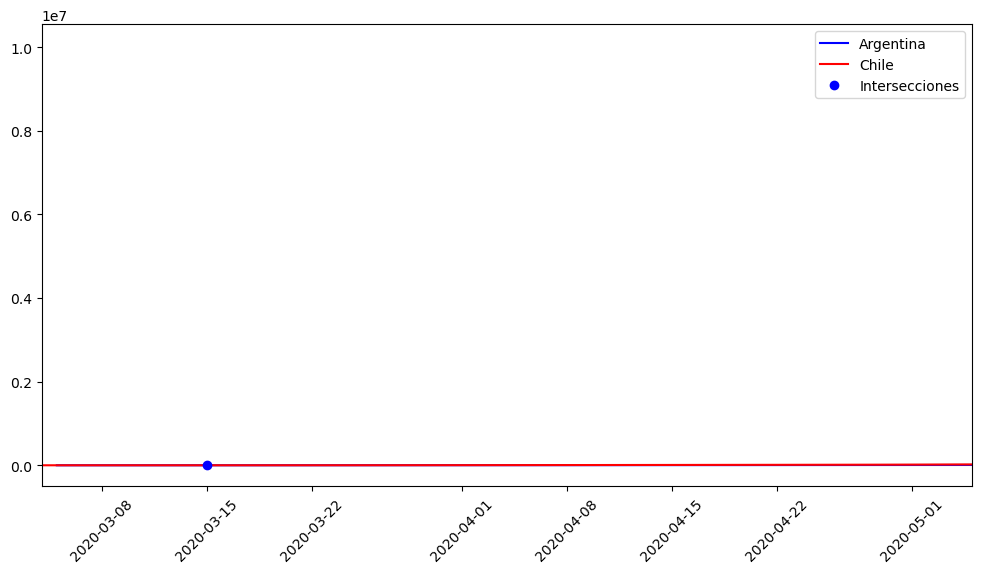

In [3]:
print("Ingrese dos países para la comparativa: ")
countryA = input()
countryB = input()
print("Ingrese el intervalo de fechas requerido:")
dateA = input()
dateB = input()

listA = (datos[datos['location'] == countryA]).to_dict("list")
listB = (datos[datos['location'] == countryB]).to_dict("list")

x1 = pd.to_datetime(listA['date'])
x2 = pd.to_datetime(listB['date'])

y1 = listA['total_cases']
y2 = listB['total_cases']

fechas = []
valores = []
bandera = False
for i in range(1, len(listA['total_cases']), 1):
    if listA['date'][i] == dateA:
        bandera = True
    if listA['date'][i] == dateB:
        bandera = False
    if bandera == True:
        ayerA = listA['total_cases'][i-1]
        ayerB = listB['total_cases'][i-1]
        actualA = listA['total_cases'][i]
        actualB = listB['total_cases'][i]
        date = pd.to_datetime(listA['date'][i])
        if actualA == actualB:
            fechas.append(date)
            valores.append(actualA)
        elif ayerB > ayerA and actualA > actualB:
            fechas.append(date)
            valores.append(actualB)
        elif ayerA > ayerB and actualB > actualA:
            fechas.append(date)
            valores.append(actualB)
print(fechas)
plt.figure(figsize=(12, 6))
plt.plot(x1, y1, 'b-', label = countryA)
plt.plot(x2, y2, 'r-', label = countryB)
#plt.axis([pd.to_datetime(dateA), pd.to_datetime(dateB), 0, 1500000])
#plt.gca().set_xbound(pd.to_datetime(dateA), pd.to_datetime(dateB))
plt.gca().set_xlim([pd.to_datetime(dateA), pd.to_datetime(dateB)])
plt.plot(fechas,valores,"bo",label="Intersecciones")
plt.xticks(rotation=45)
plt.legend()
plt.show()


**Gráfico de n paises en escala logaritmica**

Ingrese dos países para la comparativa: 


 Argentina
 Uruguay
 -


Ingrese el intervalo de fechas requerido:


 2020-03-03
 2020-12-12


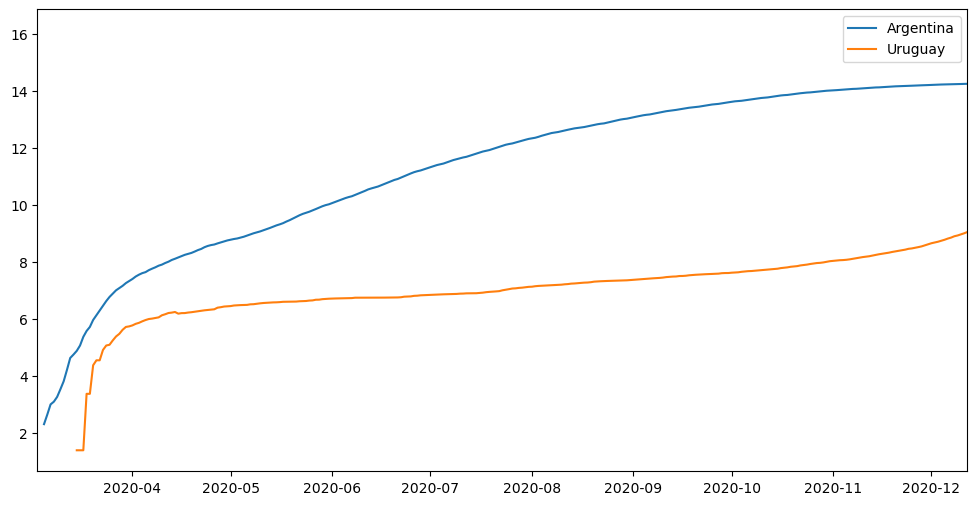

In [4]:
countries = []
print("Ingrese dos países para la comparativa: ")
country = input()
while country != '-':
    countries.append(country)
    country = input()
print("Ingrese el intervalo de fechas requerido:")
dateA = input()
dateB = input()

plt.figure(figsize=(12, 6))

for i in range(0, len(countries), 1):
    l = (datos[datos['location'] == countries[i]]).to_dict("list")
    x = pd.to_datetime(l['date'])
    y = np.log(l['total_cases'])
    plt.plot(x, y, label = str(countries[i]))

#plt.axis([pd.to_datetime(dateA), pd.to_datetime(dateB), 0, 20])
a = dateA.split("-")
b = dateB.split("-")

#plt.set_xlim=([datetime.date(int(a[0]), int(a[1]), int(a[2])), datetime.date(int(b[0]), int(b[1]), int(b[2]))])
#plt.gca().set_xbound(datetime.date(int(a[0]), int(a[1]), int(a[2])), datetime.date(int(b[0]), int(b[1]), int(b[2])))
plt.gca().set_xbound(pd.to_datetime(dateA), pd.to_datetime(dateB))
#gca obtiene los ejes actuales
plt.legend()
plt.show()

Ingrese País a graficar: 


 Spain


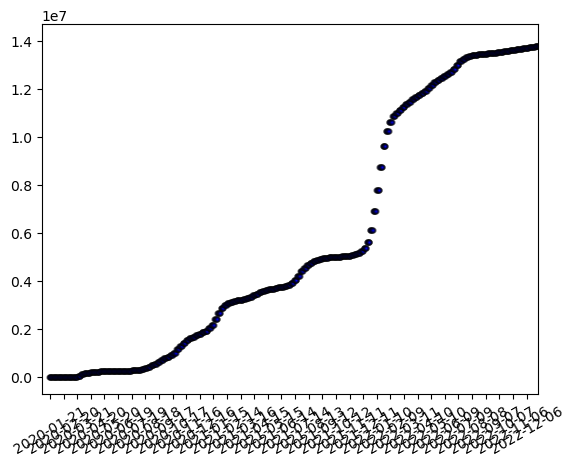

In [13]:
print("Ingrese País a graficar: ")
paisElegido = input()
datosElegido = {}
datosElegido = datos[datos['location'] == paisElegido]
listElegido = datosElegido.to_dict("list")
x = pd.to_datetime(listElegido['date'])
y1 = listElegido['total_cases']
# Set X range. Using left and right variables makes it easy to change the range.
#
left = dt.date(2020, 1, 3)
right = dt.date(2022, 12, 31)

# Create scatter plot of Positive Cases
#
plt.scatter(
  x, y1, c="blue", edgecolor="black", 
  linewidths=1.5, marker = ".", alpha = 0.5, label="Total Positive Tested"
)

# Format the date into months & days
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 

# Change the tick interval
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30)) 

# Puts x-axis labels on an angle
plt.gca().xaxis.set_tick_params(rotation = 30)  

# Changes x-axis range
plt.gca().set_xbound(left, right)

plt.show()

In [15]:
dateInicial = input()
dateFinal = input()
bandera = False
datosDelDia = {}
listaDelDia = []
listaF = []
workbook = xlsxwriter.Workbook('./archivo.xlsx')
for i in (listA['date']):
    listaFinal = []
    if i == dateInicial:
        bandera = True
    if i == dateFinal:
        bandera = False
    if bandera == True:
        datosDelDia = datos[datos['date'] == i]
        #datosDelDia[['total_cases', 'total_deaths']] = datosDelDia[['total_cases', 'total_deaths']].fillna(0) 
        listaDelDia = datosDelDia.to_dict("list")
        locations = listaDelDia['location']
        cases = listaDelDia['total_cases']
        deaths = listaDelDia['total_deaths']
        for j in range(0, len(locations), 1):
            if pd.isna(cases[j]):
                cases[j] = 0
            if pd.isna(deaths[j]):
                deaths[j] = 0
            listaFinal.append((cases[j], deaths[j], locations[j]))
        listaFinal.sort(reverse=True)
        worksheet =  workbook.add_worksheet(str(i))
        worksheet.write(0, 0, "location")
        worksheet.write(0, 1, "total_cases")
        worksheet.write(0, 2, "total_deaths")
        for i in range(0, len(listaFinal), 1):
            worksheet.write(i+1, 0, str(listaFinal[i][2]))
            worksheet.write(i+1, 1, int(listaFinal[i][0]))
            worksheet.write(i+1, 2, int(listaFinal[i][1]))

workbook.close()

 2020-03-03
 2020-04-03
